# Import Dependencies and Check GPU

In [1]:
import torch
import numpy as np
import random
import os
import shutil

from sklearn.metrics import roc_curve, auc
from task5Utils import load_dataset, get_model, train, plot_loss, evaluate, plot_roc

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", device)

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device: cuda


# Set Seeds

In [2]:
# Set Seeds

seed = 50

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True

# Define Model Names

In [3]:
name_list = [
    'task5-Crossformer-RGB-224-LR-1e-05-gamma-0.7-step-4-epochs-60',
    'task5-ViT_B16-RGB-224-LR-3e-05-gamma-0.7-step-3-epochs-30',
    'task5-EfNetB2-RGB-224-LR-0.001-gamma-0.2-step-5-epochs-30',
    'task5-Linformer-RGB-224-LR-1e-05-gamma-0.7-step-4-epochs-60'
]

# Load Data

In [4]:
train_loader, test_loader, CLASSES = load_dataset(256)

# Get Predictions and ROC Statistics

In [5]:
fpr_tpr_list = []
auc_scores_list = []

for name in name_list:
    checkpoint_dir = './checkpoints_'+name
    checkpoint_path = os.path.join(checkpoint_dir, name+'-BEST.pkl')
    
    y_true, y_pred_pos = evaluate(name, test_loader, checkpoint_path)
    fpr, tpr, _ = roc_curve(y_true, y_pred_pos)
    auc_score = auc(fpr, tpr)
    
    fpr_tpr_list.append((fpr, tpr))
    auc_scores_list.append(auc_score)

/home/sw01635/.local/lib/python3.8/site-packages/torch/functional.py:598: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2320.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.14it/s]


# Plot ROC

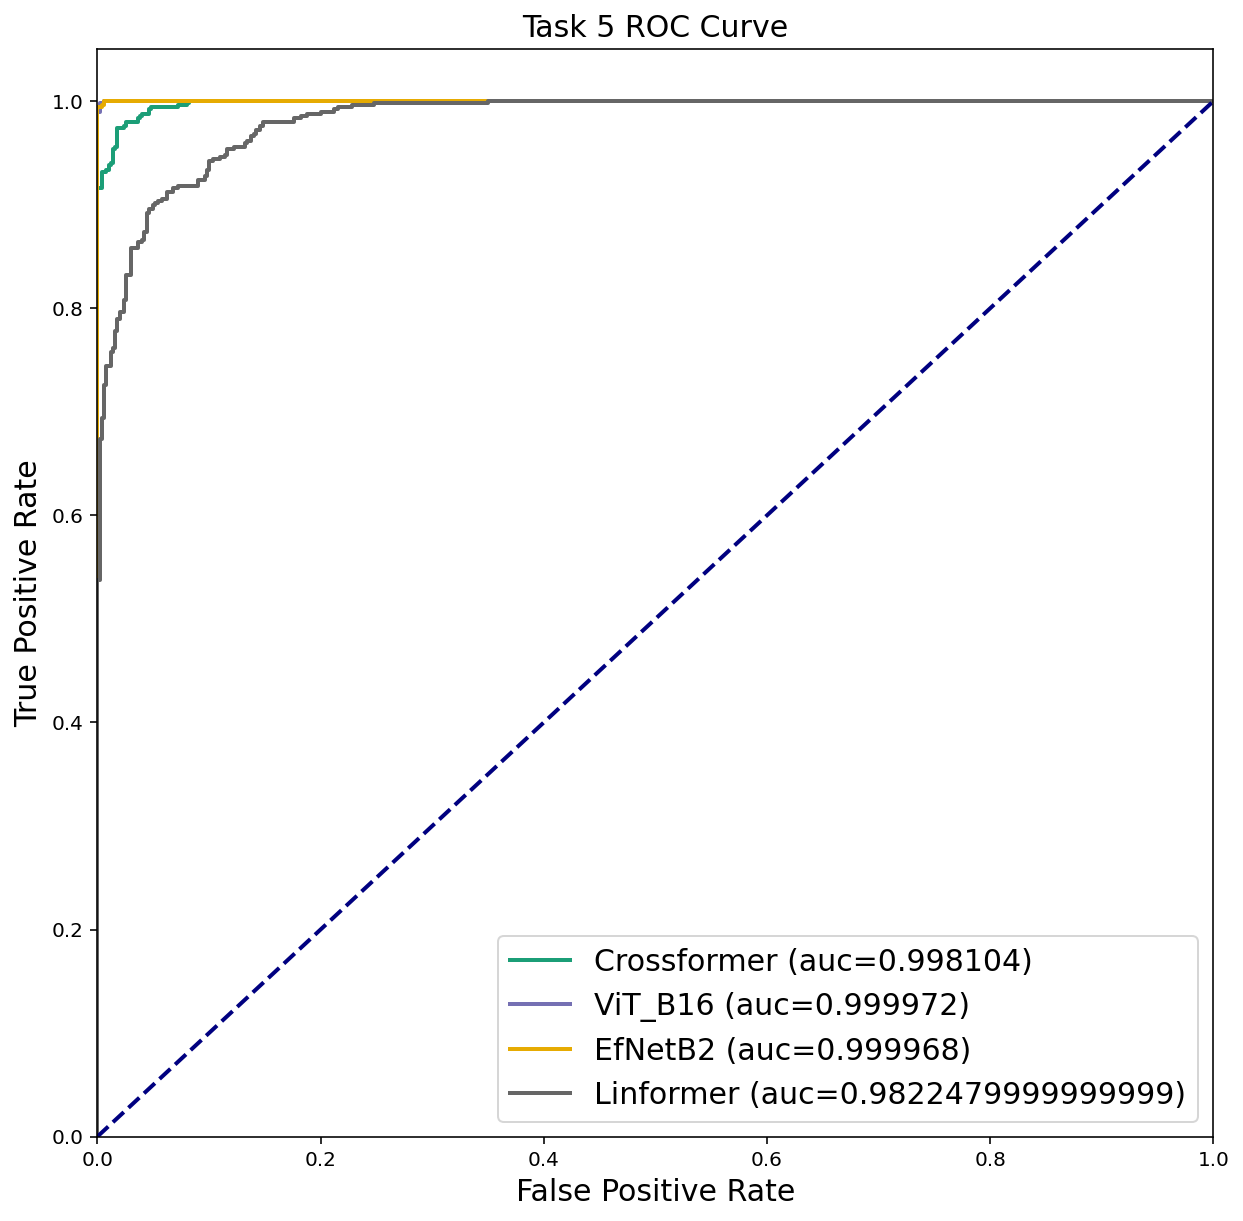

In [6]:
plot_roc(name_list, fpr_tpr_list, auc_scores_list, figsize=10, linewidth=2, fontsize=15)